# Automobile Dataset - Univariate Analysis

This notebook contains detailed steps followed for analysing the automobile data set. For more details about the dataset and attribute information, [refer here](https://archive.ics.uci.edu/ml/datasets/automobile)

## Load cleansed and prepared data
The original automobile data set has been put through data wrangling, cleansing etc. and has been stored as cardata_cleaned.csv. This sheet loads the cleaned up data for analysis. Cleansing steps were separated out inorder to reduce clutter.

*The "AutomobileDataSet_PrepareData.ipynb" contains all the scripts used to clean the original dataset.*

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read data from CSV file
cars=pd.read_csv("./cardata_cleaned.csv")


## Summary of Variables

In [2]:
cars.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


## Univariate Analysis
Following variables shall be analysed 
* make - text, categorical
* symboling - numeric, categorical, ordinal
* body-style - text, categorical
* num_doors - numeric, categorical, ordinal (derived from num-doors)
* drive-wheels - text, categorical
* normalized-losses - numeric, continuous
* wheel-base - numeric, continuous
* height - numeric, continuous
* engine_size_cc - numeric, continuous (derived from engine-size)
* bore - numeric, continuous
* stroke - numeric, continuous
* horsepower - numeric, continuous
* city-mpg - numeric, continuous
* price - numeric, continuous
* num_cylinders - numeric, categorical, ordinal (derived from num-of-cylinders)
* curb-weight - numeric, continuous


In [3]:
#common charting parameters
plot_color = "#dd0033"
title_color = "#333333"
y_title_margin = 1.0 # The amount of space above titles
left   =  0.10  # the left side of the subplots of the figure
right  =  0.95    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.5    # the top of the subplots of the figure
wspace =  0.1     # the amount of width reserved for blank space between subplots
hspace = 0.6 # the amount of height reserved for white space between subplots

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)
sns.set_style("whitegrid") #set seaborn style template

<Figure size 432x288 with 0 Axes>

### Make

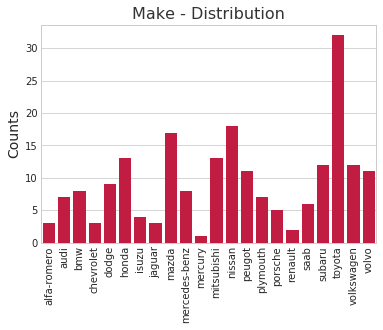

In [4]:
make_hist=sns.countplot(cars['make'], color=plot_color)
make_hist.set_xticklabels(make_hist.get_xticklabels(), rotation=90)
make_hist.set_xlabel('')
make_hist.set_ylabel('Counts', fontsize=14)

ax = make_hist.axes
ax.patch.set_alpha(0)
ax.set_title('Make - Distribution', fontsize=16, color="#333333")
fig = make_hist.get_figure()
fig.figsize=(10,5)
fig.patch.set_alpha(0.5)
fig.savefig('01make_distribution.png',dpi=fig.dpi,bbox_inches='tight')

Toyota has the highest number of models, compared to other manufacturers.   

### Symboling and Normalized Losses

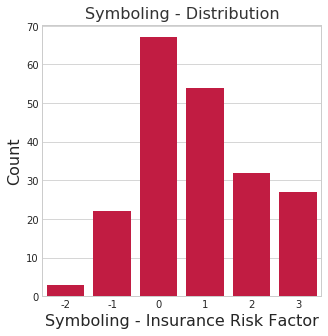

In [5]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects for a 3x2 subplot figure

fig.patch.set_alpha(0.5)
ax.set_title("Symboling - Distribution", y = y_title_margin, color=title_color,fontsize=16)

#Set transparency for individual subplots.
ax.patch.set_alpha(0.5)

symbol_hist=sns.countplot(cars["symboling"], color=plot_color, ax=ax )
#symbol_hist.set_xticklabels(symbol_hist.get_xticklabels(), rotation=90,fontsize=12)
symbol_hist.set_ylabel('Count',fontsize=16 )
symbol_hist.set_xlabel('Symboling - Insurance Risk Factor',fontsize=16)

#plt.show()
fig.savefig('02symboling_distribution.png',dpi=fig.dpi,bbox_inches='tight')

Above chart shows how the symboling values are distributed across the data set. -3 is least risky, while +3 is most risky vehicle. majority of car models fall on the riskier side.

### Body Style, Number of Doors and Drive Wheels

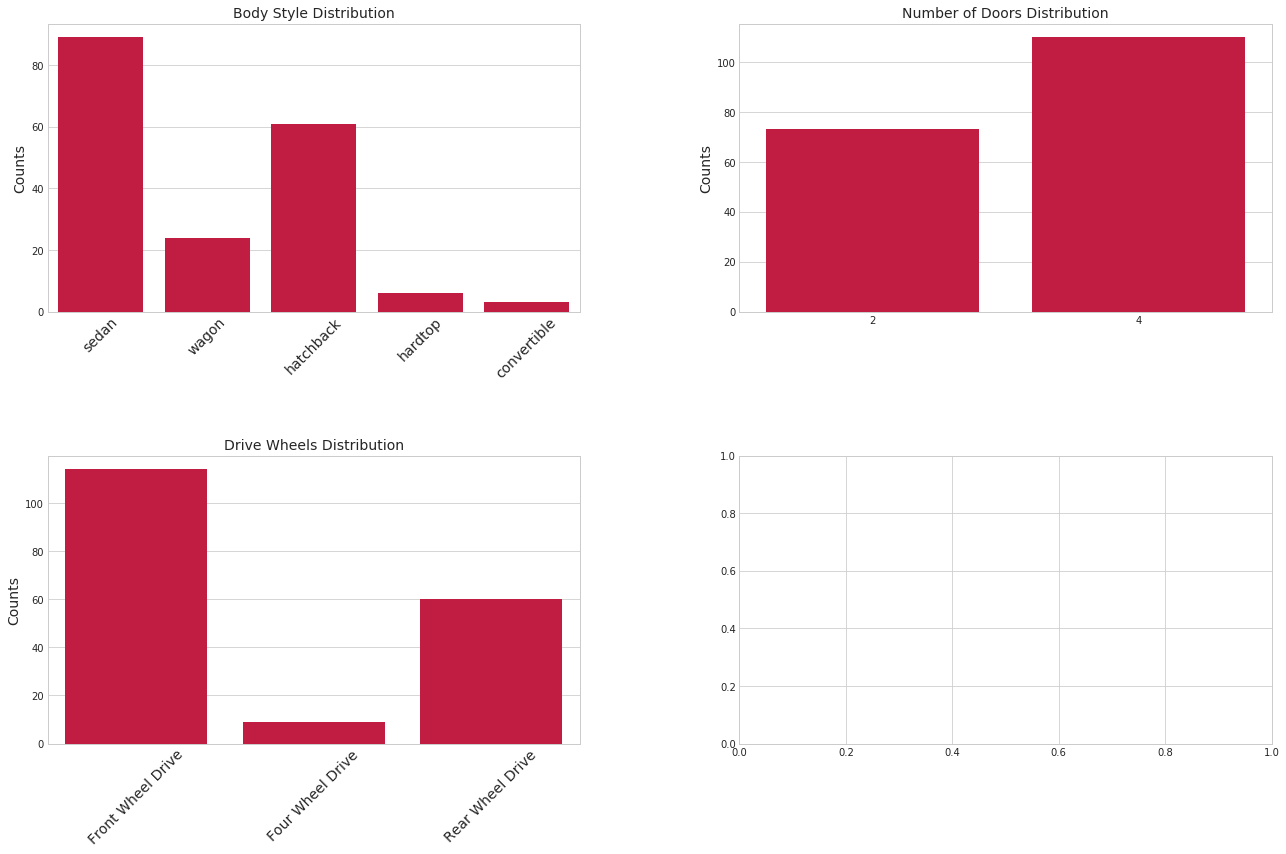

In [8]:
plot_color = "#dd0033"
title_color = "#333333"

fig, ax = plt.subplots(figsize=(20,20), ncols=2, nrows=2)

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  0.6, 
    wspace  =  0.3, 
    hspace  =  0.5
)

fig.patch.set_alpha(0.5)

ax[0][0].set_title('Body Style Distribution', fontsize=14)
ax[0][0].set_alpha(0)

bstyle_dist=sns.countplot(cars['body-style'],color=plot_color, ax=ax[0][0])
bstyle_dist.set_xticklabels(bstyle_dist.get_xticklabels(),rotation=45, fontsize=14)
bstyle_dist.set_xlabel('')
bstyle_dist.set_ylabel('Counts', fontsize=14)

ax[0][1].set_title('Number of Doors Distribution', fontsize=14)
ax[0][1].set_alpha(0)

numdoors_dist=sns.countplot(cars['num_doors'],color=plot_color, ax=ax[0][1])
numdoors_dist.set_xlabel('')
numdoors_dist.set_ylabel('Counts', fontsize=14)

ax[1][0].set_title('Drive Wheels Distribution', fontsize=14)
ax[1][0].set_alpha(0)

drvwheels_dist=sns.countplot(cars['drive-wheels'],color=plot_color, ax=ax[1][0])
drvwheels_dist.set_xticklabels(drvwheels_dist.get_xticklabels(),rotation=45, fontsize=14)
drvwheels_dist.set_xlabel('')
drvwheels_dist.set_ylabel('Counts', fontsize=14)

fig.savefig('03categorical_vars_distribution.png',dpi=fig.dpi,bbox_inches='tight')

### normalized-losses


/home/justin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


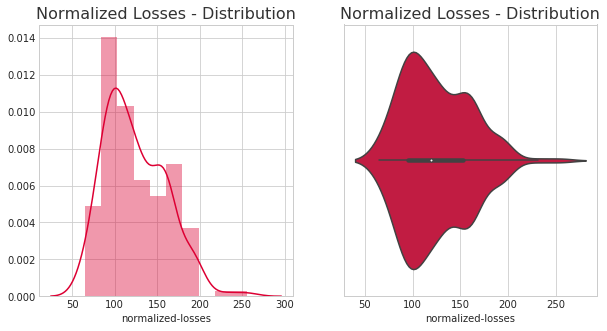

In [10]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Normalized Losses - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

normloss_hist=sns.distplot(cars["normalized-losses"], color=plot_color, ax=ax[0] )
#symbol_hist.set_xticklabels(symbol_hist.get_xticklabels(), rotation=90,fontsize=12)
#symbol_hist.set_ylabel('Count',fontsize=16 )
symbol_hist.set_xlabel('Normalized Losses',fontsize=16)

ax[1].set_title("Normalized Losses - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
normloss_hist=sns.violinplot(cars["normalized-losses"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('04normalized_losses_distribution.png',dpi=fig.dpi,bbox_inches='tight')


In [8]:
cars['normalized-losses'].describe()

count    183.000000
mean     124.274446
std       35.718009
min       65.000000
25%       95.000000
50%      119.000000
75%      153.000000
max      256.000000
Name: normalized-losses, dtype: float64

The violin plot shows an outlier on the higher value side

### wheel-base
Wheel base is the distance between the front and back wheels of a vehicle, measured from axle to axle. A sedan type car normally has a longer wheel base compared to a hatchback. 

/home/justin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


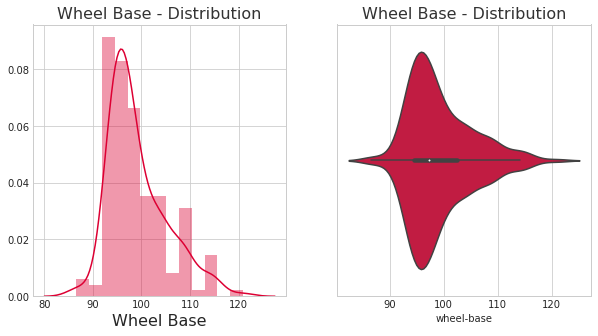

In [19]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Wheel Base - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

wbase_hist=sns.distplot(cars["wheel-base"], hist=True, color=plot_color, ax=ax[0] )
#symbol_hist.set_xticklabels(symbol_hist.get_xticklabels(), rotation=90,fontsize=12)
#symbol_hist.set_ylabel('Count',fontsize=16 )
wbase_hist.set_xlabel('Wheel Base',fontsize=16)

ax[1].set_title("Wheel Base - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
wbase_box=sns.violinplot(cars["wheel-base"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('05wheelbase_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [12]:
cars['wheel-base'].describe()

count    183.000000
mean      99.145355
std        5.979826
min       86.600000
25%       94.500000
50%       97.200000
75%      102.400000
max      120.900000
Name: wheel-base, dtype: float64

* Positively skewed distribution
* Majority of models have their wheel bases on or around the mean. The However, there is a sharp fall-off in the distribution just a little left to the mean value. This indicates that a wheel base shorter than ~93 is very rare.
* The violin plot indicates that there are outliers on the higher side.

### height
Vehicle height is a continuous value. The height plays a significant role in the dynamics of a vehicle.

/home/justin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


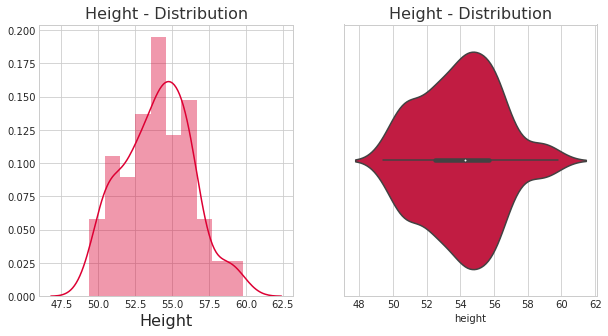

In [20]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Height - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

height_hist=sns.distplot(cars["height"], hist=True, color=plot_color, ax=ax[0] )
height_hist.set_xlabel('Height',fontsize=16)

ax[1].set_title("Height - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
height_box=sns.violinplot(cars["height"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('06height_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [26]:
cars['height'].describe()

count    183.000000
mean      54.009836
std        2.328635
min       49.400000
25%       52.500000
50%       54.300000
75%       55.700000
max       59.800000
Name: height, dtype: float64

Majority car models have their body height around the mean value. However, there is a sharp drop immediately after the mean.This shows there are not many vehicles significantly taller than the median value.

### engine_size_cc
Engine size in cubic centimeters denotes the maximum volume of all cylinders combined. As a general rule, a higher engine size denotes higher volume of fuel+air intake and hence, results in increased power.
*engine_size_cc has been derived from engine-size field, which is in inches.*

/home/justin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


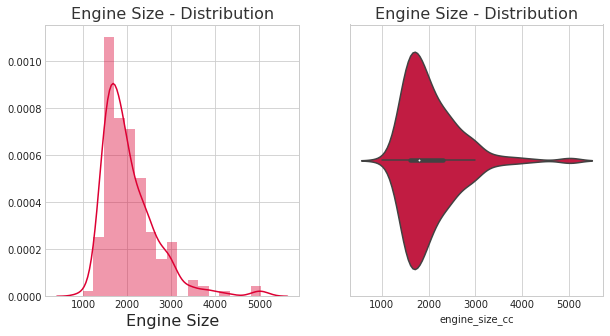

In [21]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Engine Size - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

enginesize_hist=sns.distplot(cars["engine_size_cc"], hist=True, color=plot_color, ax=ax[0] )
enginesize_hist.set_xlabel('Engine Size',fontsize=16)

ax[1].set_title("Engine Size - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
enginesize_box=sns.violinplot(cars["engine_size_cc"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('07enginesize_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [34]:
print("Mode:" + str(cars["engine_size_cc"].mode()))
print(cars["engine_size_cc"].describe())

Mode:0    1507
dtype: int64
count     183.000000
mean     2051.038251
std       619.911154
min       999.000000
25%      1597.000000
50%      1802.000000
75%      2310.000000
max      5047.000000
Name: engine_size_cc, dtype: float64


* The distribution is right (positively) skewed. 
* There is a very high number of smaller sized engines. 1500-2000 cc engines are most common, even though, the mean engine size is 2051 cc.
* There are a few high capacity outlier engines too. 

### bore
The bore is the diameter of the cylinder in which the piston moves. 

/home/justin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


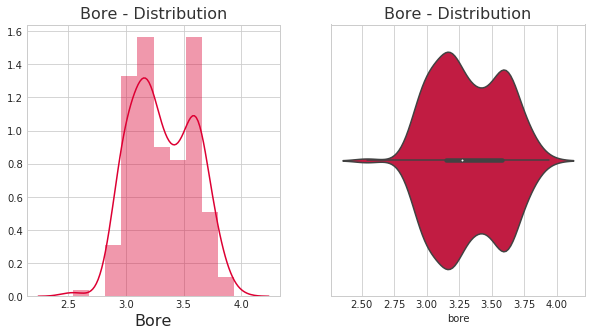

In [22]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Bore - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

bore_hist=sns.distplot(cars["bore"], hist=True, color=plot_color, ax=ax[0] )
#symbol_hist.set_xticklabels(symbol_hist.get_xticklabels(), rotation=90,fontsize=12)
#symbol_hist.set_ylabel('Count',fontsize=16 )
bore_hist.set_xlabel('Bore',fontsize=16)

ax[1].set_title("Bore - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
bore_box=sns.violinplot(cars["bore"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('08bore_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [41]:
print("Mode:" + str(cars["bore"].mode()))
print(cars["bore"].describe())
#cars["bore"].value_counts()

Mode:0    3.62
dtype: float64
count    183.000000
mean       3.319180
std        0.266755
min        2.540000
25%        3.150000
50%        3.270000
75%        3.580000
max        3.940000
Name: bore, dtype: float64


There are two peaks. Bore values tend to concentrate near 3.19 and 3.62. 

### stroke
Stroke is the distance travelled by the piston in each cycle. The stroke length - along with bore diameter- determines the engine's displacement (Engine Size).

/home/justin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


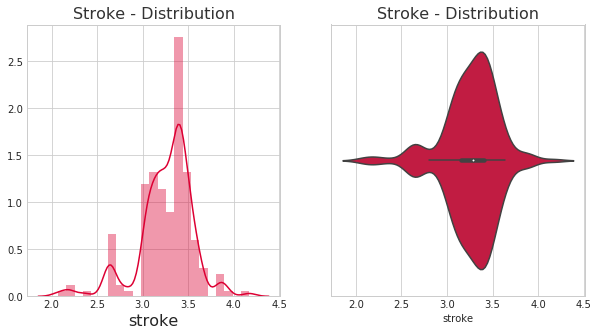

In [23]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Stroke - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

stroke_hist=sns.distplot(cars["stroke"], hist=True, color=plot_color, ax=ax[0] )
stroke_hist.set_xlabel('stroke',fontsize=16)

ax[1].set_title("Stroke - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
stroke_box=sns.violinplot(cars["stroke"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('09stroke_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [52]:
print("Mode:" + str(cars["stroke"].mode()[0]))
print("Median:" + str(cars["stroke"].median()))

print(cars["stroke"].describe())
#cars["stroke"].value_counts()

Mode:3.4
Median:3.29
count    183.000000
mean       3.258962
std        0.305088
min        2.070000
25%        3.150000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64


Majority of engine stroke values fall between 3.15 and 3.41. Barring a few outliers, the curve falls off sharply beyond the inter quartile range.

### horsepower
Horsepower of an engine determines how quickly a vehicle can reach top speed from halt. It is a crucial performance parameter of the vehicle

/home/justin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


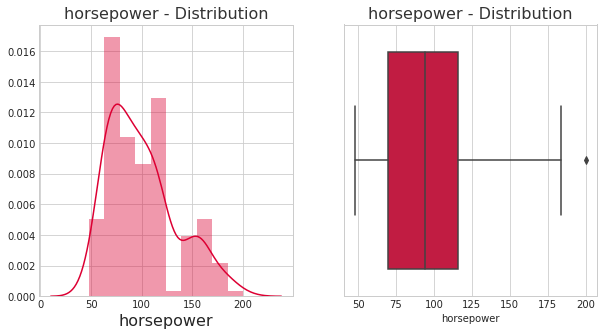

In [24]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("horsepower - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

hp_hist=sns.distplot(cars["horsepower"], hist=True, color=plot_color, ax=ax[0] )
hp_hist.set_xlabel('horsepower',fontsize=16)

ax[1].set_title("horsepower - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
hp_box=sns.boxplot(cars["horsepower"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('10horsepower_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [54]:
print("Mode:" + str(cars["horsepower"].mode()[0]))
print("Median:" + str(cars["horsepower"].median()))

print(cars["horsepower"].describe())
#cars["stroke"].value_counts()

Mode:68
Median:94.0
count    183.000000
mean     100.295082
std       33.713080
min       48.000000
25%       70.000000
50%       94.000000
75%      116.000000
max      200.000000
Name: horsepower, dtype: float64


Horsepower shows a positively skewed distribution. Majority of engines tend to have a lower power output within the power range of the dataset.  

### city-mpg
Miles per Gallon shows the fuel efficiency of a vehicle.

/home/justin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


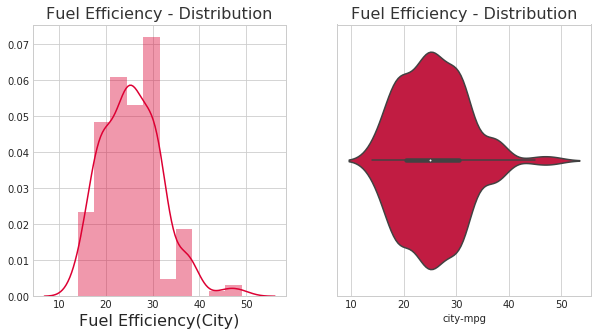

In [26]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Fuel Efficiency - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

citympg_hist=sns.distplot(cars["city-mpg"], hist=True, color=plot_color, ax=ax[0] )
citympg_hist.set_xlabel('Fuel Efficiency(City)',fontsize=16)

ax[1].set_title("Fuel Efficiency - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
citympg_box=sns.violinplot(cars["city-mpg"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('11citympg_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [57]:
print("Mode:" + str(cars["city-mpg"].mode()[0]))
print("Median:" + str(cars["city-mpg"].median()))

print(cars["city-mpg"].describe())
#cars["city-mpg"].value_counts()

Mode:31
Median:25.0
count    183.000000
mean      25.666667
std        6.338729
min       14.000000
25%       20.500000
50%       25.000000
75%       30.500000
max       49.000000
Name: city-mpg, dtype: float64


### price

/home/justin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


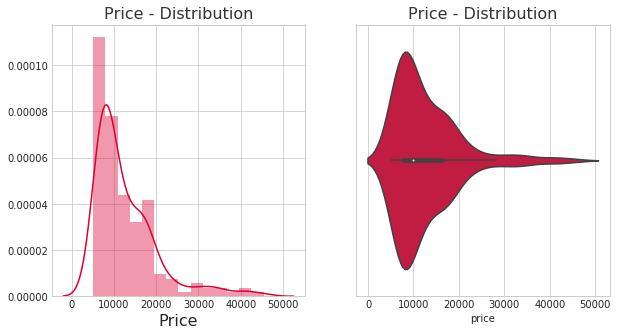

In [7]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Price - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

price_hist=sns.distplot(cars["price"], hist=True, color=plot_color, ax=ax[0] )
price_hist.set_xlabel('Price',fontsize=16)

ax[1].set_title("Price - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
normloss_hist=sns.violinplot(cars["price"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('12price_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [6]:
print("Mode:" + str(cars["price"].mode()[0]))
print("Median:" + str(cars["price"].median()))

print(cars["price"].describe())
#cars["price"].value_counts()

Mode:5572.0
Median:9988.0
count      183.000000
mean     12709.858834
std       7438.115517
min       5118.000000
25%       7649.000000
50%       9988.000000
75%      16214.000000
max      45400.000000
Name: price, dtype: float64


Price shows a positively skewed distriution. Most common car prices are below 10K. There are outliers having prices upwards of 30K.

### num_cylinders
Number of cylinders determines the size of the engine as well as its performance. It is a categorical variable whose values can vary from 3 to 8 for a car engine.

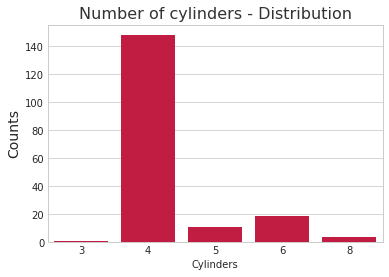

In [13]:
ncyl_hist=sns.countplot(cars['num_cylinders'], color=plot_color)
ncyl_hist.set_xlabel('Cylinders')
ncyl_hist.set_ylabel('Counts', fontsize=14)

ax = ncyl_hist.axes
ax.patch.set_alpha(0)
ax.set_title('Number of cylinders - Distribution', fontsize=16, color="#333333")
fig = ncyl_hist.get_figure()
fig.figsize=(10,5)
fig.patch.set_alpha(0.5)
fig.savefig('13numcylinders_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [12]:
print("Mode:" + str(cars["num_cylinders"].mode()[0]))
print("Median:" + str(cars["num_cylinders"].median()))

print(cars["num_cylinders"].describe())
#cars["num_cylinders"].value_counts()

Mode:4
Median:4.0
count    183.000000
mean       4.349727
std        0.843910
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        8.000000
Name: num_cylinders, dtype: float64


In [ ]:
4 cylinder engines are most common for cars. 

### curb-weight
curb weight or kerb weight is the total weight of a car with all standard equipments. It will include consumables like engine oil, transmission oil, refrigerent, and fuel. It will not include weight of passengers and luggage.

/home/justin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


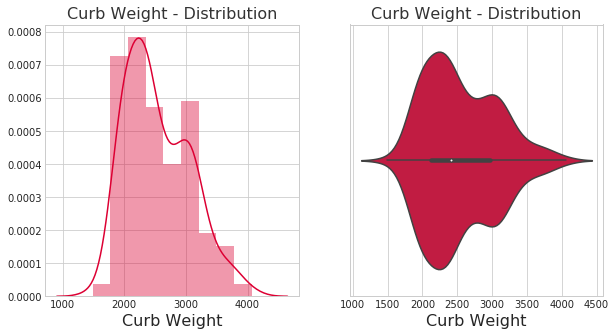

In [17]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Curb Weight - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

cweight_hist=sns.distplot(cars["curb-weight"], hist=True, color=plot_color, ax=ax[0] )
cweight_hist.set_xlabel('Curb Weight',fontsize=16)

ax[1].set_title("Curb Weight - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
cweight_box=sns.violinplot(cars["curb-weight"], color=plot_color, ax=ax[1] )
cweight_box.set_xlabel('Curb Weight',fontsize=16)

#plt.show()
fig.savefig('12curbweight_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [18]:
print("Mode:" + str(cars["curb-weight"].mode()[0]))
print("Median:" + str(cars["curb-weight"].median()))

print(cars["curb-weight"].describe())
#cars["curb-weight"].value_counts()

Mode:1918
Median:2405.0
count     183.000000
mean     2542.054645
std       518.033610
min      1488.000000
25%      2128.000000
50%      2405.000000
75%      2964.500000
max      4066.000000
Name: curb-weight, dtype: float64
